In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = data['data']
Y = data['target']

print("Input  Shape : {}".format(X.shape))
print("Output Shape : {}".format(Y.shape))

Input  Shape : (569, 30)
Output Shape : (569,)


In [4]:
test_size = 0.25
Ntest = int(len(X) * test_size)

test_idxs = np.random.choice(len(X), Ntest, replace=False)

mask = np.ones(Y.size, dtype=bool)
mask[test_idxs] = False

Xtrain = X[mask]
Ytrain = Y[mask]

Xtest = X[test_idxs]
Ytest = Y[test_idxs]

print("Train Input  Shape : {}".format(Xtrain.shape))
print("Train Output Shape : {}\n".format(Ytrain.shape))

print("Test  Input  Shape : {}".format(Xtest.shape))
print("Test  Output Shape : {}\n".format(Ytest.shape))

Train Input  Shape : (427, 30)
Train Output Shape : (427,)

Test  Input  Shape : (142, 30)
Test  Output Shape : (142,)



In [5]:
scalar = StandardScaler()
scalar.fit(Xtrain)

Xtrain = scalar.transform(Xtrain)
Xtest  = scalar.transform(Xtest)

In [6]:
model = nn.Sequential(
                nn.Linear(Xtrain.shape[1], 1),
                nn.Sigmoid()
                )
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [7]:
'''
Please Make sure to convert your targets into 2D array such like (N,1) shape. This isn't needed
in other frameworks such as tensorflow, keras & scikit-learn. But in pytroch you make sure to
unsqueeze targets
'''
Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32).reshape(-1,1))

Xtest = torch.from_numpy(Xtest.astype(np.float32))
Ytest = torch.from_numpy(Ytest.astype(np.float32).reshape(-1,1))

In [8]:
n_epoches = 1000

TrainLoss = []
TestLoss = []

for epoch in range(n_epoches):
    
    optimizer.zero_grad()
    
    prediction = model(Xtrain)
    loss = criterion(prediction, Ytrain)
    TrainLoss.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    prediction_test = model(Xtest)
    loss_test = criterion(prediction_test, Ytest)
    TestLoss.append(loss_test.item())
    
    print("epoch {}/{} , Train Loss : {} , Test Loss : {}".format(epoch+1, n_epoches, loss.item(), loss_test.item()))

epoch 1/1000 , Train Loss : 0.7112409472465515 , Test Loss : 0.6951330900192261
epoch 2/1000 , Train Loss : 0.7043485641479492 , Test Loss : 0.6886696219444275
epoch 3/1000 , Train Loss : 0.6975345611572266 , Test Loss : 0.6822892427444458
epoch 4/1000 , Train Loss : 0.6908000707626343 , Test Loss : 0.6759865283966064
epoch 5/1000 , Train Loss : 0.6841455101966858 , Test Loss : 0.6697537302970886
epoch 6/1000 , Train Loss : 0.6775710582733154 , Test Loss : 0.663583517074585
epoch 7/1000 , Train Loss : 0.6710764765739441 , Test Loss : 0.6574742197990417
epoch 8/1000 , Train Loss : 0.6646612286567688 , Test Loss : 0.65142822265625
epoch 9/1000 , Train Loss : 0.6583252549171448 , Test Loss : 0.6454495191574097
epoch 10/1000 , Train Loss : 0.6520687341690063 , Test Loss : 0.6395416855812073
epoch 11/1000 , Train Loss : 0.6458920240402222 , Test Loss : 0.633707582950592
epoch 12/1000 , Train Loss : 0.6397956013679504 , Test Loss : 0.6279495358467102
epoch 13/1000 , Train Loss : 0.6337793469

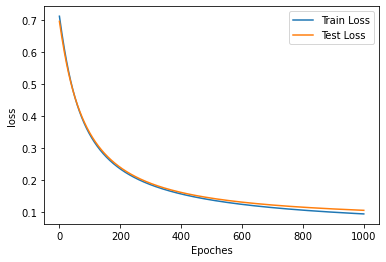

In [9]:
plt.plot(TrainLoss, label='Train Loss')
plt.plot(TestLoss, label='Test Loss')
plt.xlabel('Epoches')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
# Model Accuracy

with torch.no_grad():
    Ptrain = model(Xtrain).numpy()
    Ptest  = model(Xtest).numpy()
    
    Ptrain = Ptrain > 0.5
    Ptest  = Ptest > 0.5
    
    train_acc = np.mean(Ptrain == Ytrain.numpy())
    test_acc = np.mean(Ptest == Ytest.numpy())
    print("Train Accuracy : {} , Test Accuracy : {}".format(train_acc, test_acc))

Train Acc : 0.9859484777517564 , Test Acc : 0.9647887323943662


In [15]:
# Save the Model

state_dict = model.state_dict()
torch.save(state_dict, 'cancer.pt')

In [16]:
# Load the Model

model_load = nn.Sequential(
                nn.Linear(Xtrain.shape[1], 1),
                nn.Sigmoid()
                )
model_load.load_state_dict(
                    torch.load('cancer.pt')
                        )

<All keys matched successfully>

In [18]:
# Check Model Accuracy Again

with torch.no_grad():
    Ptrain = model_load(Xtrain).numpy()
    Ptest  = model_load(Xtest).numpy()
    
    Ptrain = Ptrain > 0.5
    Ptest  = Ptest > 0.5
    
    train_acc = np.mean(Ptrain == Ytrain.numpy())
    test_acc = np.mean(Ptest == Ytest.numpy())
    print("Model Loading .....")
    print("Train Accuracy : {} , Test Accuracy : {}".format(train_acc, test_acc))

Model Loading .....
Train Accuracy : 0.9859484777517564 , Test Accuracy : 0.9647887323943662
